## Content



Logistic Regression-2 

7. log-loss
8. Optimization
9. Scratch code for implementation 
10. Accuracy 
11. Log-odds 
13. Impact of Outliers
14. Churn Prediction implement 



## Logistic Regression-2 

### Log-loss



<img src='https://drive.google.com/uc?id=1ei8v6vmyuuSLX6OXXVzLhKOOUk_PU8rP'>



Recap:

- We have data of n samples $(x_i,y_i)_{i=1}^{i=n}$ where $x_i$ is a d feature vector with values belonging to Real number. While $y_i$ has value 0 or 1 on the basis of which the data is categorized.

- we want a linear hyperplane ($\pi d =  w^Tx+w_0$) that best separates the data out into two categories 

- We saw some huddles while performing logistic Regression to find the best hyperplane:

    - How $z_i=w^Tx_i+w_0$ can range between $(-∞,+∞)$ but $y_i$ in range (0,1) 
        - Solution: used sigmoid function $σ(z_i) = \frac{1}{1+e^{-z_i}}$



Now we have $y_i$ values as 0 or 1 but our predicted $y_î$ which ranges between 0 and 1 
#### How to compare $y_i$ vs $y_î$ to optimize the weights of the model ?
We use Log-Loss as the loss function for Classification of data 


<img src='https://drive.google.com/uc?id=1R_C_cXOpra4Y6Xz0U0IcDrlMrM0M1_6w'>



For Log-loss function we say,
- when $y_i=1$, log loss is equal to $-log(y_i ̂ $)
- when $y_i=0$, log loss is equal to $-log(1-y_i ̂$)

if we consider only the case when $y_i=1$, log loss is equal to $-log(y_i ̂ $), the plot shows:
- how drastically the value of $-log(y_î)$ decreases as $y_î $ moves from 0 towards 1

#### But how can the drastic change in value of $-log(y_î)$ help ?  
- Notice how $-log(y_î)$ is very high when $y_i = 1$ and $y_î = 0 $ 
- And how $-log(y_î)$ is very low or equal to 0 when $y_i = 1$ and $y_î = 1 $ 
- Thus making the logistic Regression model to have weights close to $y_i = 1$ 

if we consider only the case when $y_i = 0 $, log loss is equal to $-log(1- y_i ̂ $), the plot shows:
- how drastically the value of $-log(1-y_î)$ increases as $y_î $ moves from 0 towards 1

#### What can we understand from this plot then ?
- if $y_i = 0$ and $y_î = 0 $ $-log(1-y_î)$ is very small or close to 0 
- but if $y_i = 0$ and $y_î = 1 $ $-log(1-y_î)$ is very large



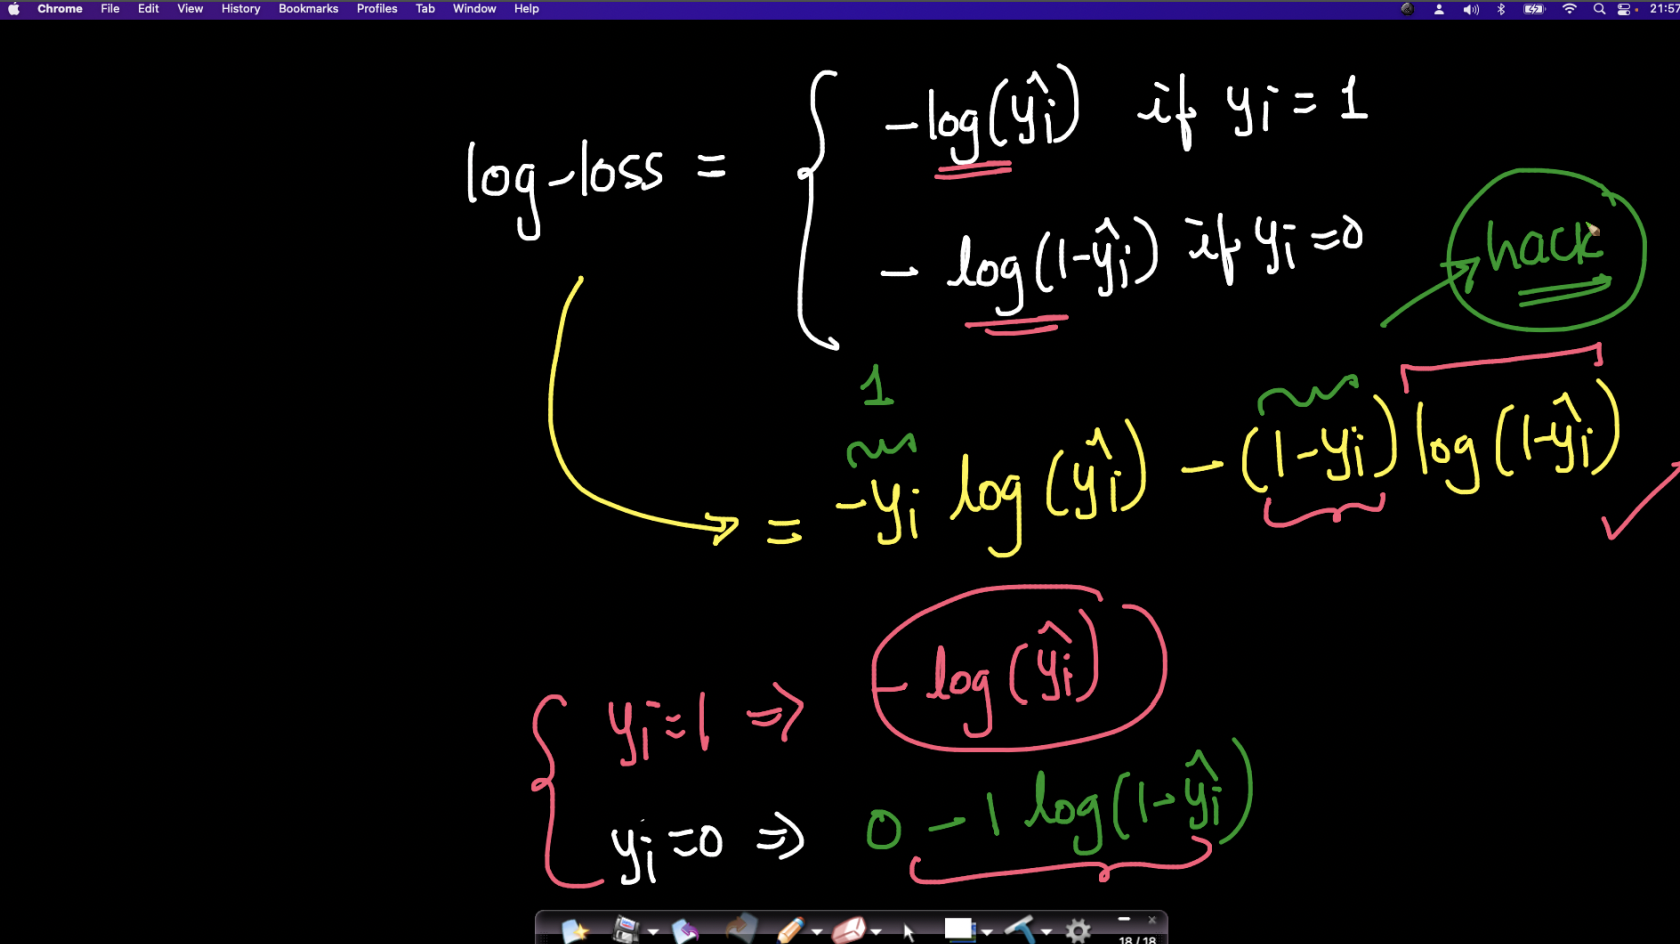

#### What hack can we use to combine both the two log-losses?

Simply add them (one of the parts will also be zero)


- log-loss $ = -y_i log(y_i ̂) - (1-y_i) log(1-y_i ̂)$
- if $y_i = 1$ ==> log-loss $= -1log(y_i ̂) - (1-1)log(1-y_i ̂) = -log(y_i ̂)$
- if $y_i = 0$ ==> log-loss $= -0log(y_i ̂) - (1-0)log(1-y_i ̂) = -log(1-y_i ̂)$    

####Question: Why Log-loss?

- We will derive Logistic Regression using Probability Theory by using something known as  **maximum likelihood estimation (MLE)**, naturally the function which we will get is log-loss.

- We can use any other function for calcualting the loss, but then that will be a different classifier model and not logistic regression.







#### Question: Why does Mean squared Error (MLE) loss does not work ? 

- Recall how for model to perform well, we want the loss function to be a convex function w.r.t the weights of the model

#### Why Convex function ?
- Recall, how convex functo have one global minima to in the 


- One of the main reasons why MSE doesn’t work with logistic regression is when the MSE loss function is plotted with respect to weights of the logistic regression model, the curve obtained is not a convex curve which makes it very difficult to find the global minimum.

  


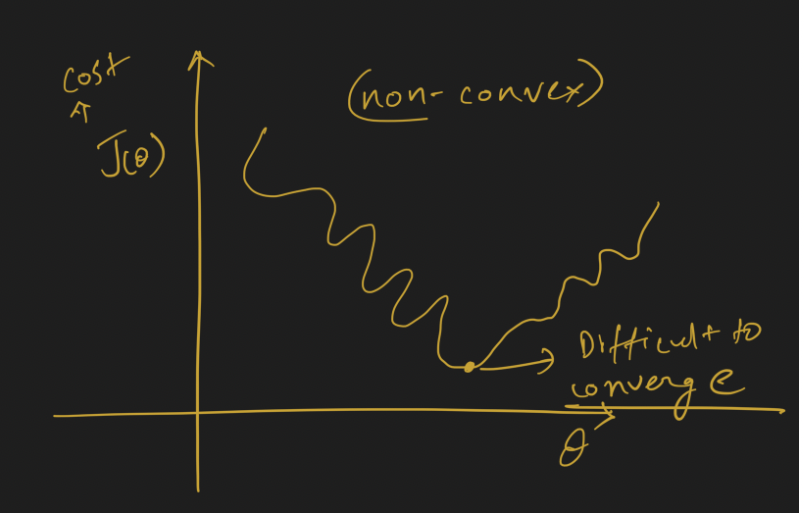

- if we used MSE, the output of sigmoid function when passed to MSE returns a non-convex function 

Problems:
- Difficult to converge.
- Gradients can get stuck at local minimum.




Now let's a take a look at how to implement log-loss function

Case1: 
- When $y_i = 1$ and $y_î = 0.9$

In [ ]:
import math 

y = 1
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- Notice how loss is almost 0.1 which is close to 0. 


Lets bring $y_î$ even closer to 1 

Case2: 
- When $y_i = 1$ and $y_î = 0.99$

In [ ]:
y = 1
yhat=0.99
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- observe how just by incrementing $y_î$ by 0.09, there is a drastic decrease in loss

- Now lets see what happens when  $y_î$ gets closer to 0

Case3: 
- When $y_i = 1$ and $y_î = 0.1$

In [ ]:
y=1
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.3025850929940455


- Notice much high the log-loss is

Lets bring $y_î$ even closer to 0

Case4: 
- When $y_i = 1$ and $y_î = 0.01$

In [ ]:
y=1
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

4.605170185988091


- observe how just by a small variation in $y_î$, there is a drastic increase in loss


Now lets see what happens for the scenario when :  

Case5: 
- When $y_i = 0 $ and $y_î = 0.1$


In [ ]:
y=0
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- notice how there is a small loss for it which is identical to case 1

- now lets bring $y_î$ closer to 0

Case6:
- When $y_i = 0 $ and $y_î = 0.01$

In [ ]:
y=0
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- notice how loss decreased similar to case 2 


Case6:
- When $y_i = 0 $ and $y_î = 0.9$

In [ ]:
y=0
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.302585092994046


2.302585092994046

- As expected now, the loss will be high 

To summarize:
- The value of **log-loss is decreases** as our $y_î$ is geting closer to $y_i$

- and **log loss is increasing** as our $y_î$ is geting farther from $y_i$

this means that, 
- we can use Optimization techniques, like gradient descent, to  log-loss function to get the optimal weights of the logistic regression model

### Optimization


- We only have seen, log-loss for ith sample of the data.

- We define our loss function for logistic regression as  summation of log-loss$_i$ for all the n samples of the data.
    - $L = ∑_{i=1}^{i=n} [-y log(y_î) - (1-y)log(1-y_î)] $



<img src='https://drive.google.com/uc?id=1ps7CIjHM1E-4W5RKpARI7rSQu8bE-A91'>



####What is the main thing we need to check for optimization ?

The loss function should be differentiable.

Lets break the loss term in to parts to check for differentiability

1. Check if log is differentiable
    - We saw in the pre-read
    - $\frac{d log(x)}{dx} = \frac{1}{x}$
2. Check if $\hat{y_i} = σ(w^Tx_i+w_0)$ is differentiable
    -  From Linear Regression lecture, we know that $w^Tx_i+w_0$ is differentiable
    - Now we need to check for sigmoid function,  $σ = \frac{1}{1+e^{-z} }$
    - Turns out that the sigmoid functuon is a differentable function : $σ'(z) = σ(z)(1-σ(z))$
    - If you are interested, you can check the prove for this in today's post-read 

Hence we can use Gradient Descent for our loss function.








Now that we know the log-loss is differentiable, lets find the gradient of the log-loss

Before derivating log-loss, lets recall the pre-read which shows the Simple Derivation Rules 

#### Simple Derivation rules 


1. **Power Derivative**

 $$\frac{d x^{n}}{dx} = n.x^{n-1}$$

 Similarly

  $$\frac{d x^{-n}}{dx} = -n.x^{-(n+1)}$$

2. **Log Derivative**

$$\frac{d log(x)}{dx} = \frac{1}{x}$$


3. **Exponential Derivative**

 $$\frac{d e^{ax}}{dx} = a.e^{ax}$$

 Similarly, 

 $$\frac{d e^{-ax}}{dx} = -a.e^{-ax}$$



---



Now our log-loss is defined as:
- $$Logloss (L) = min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î) $$

- What all we know 
    - $$\frac{d log(x)}{dx} = \frac{1}{x}$$
    - $$ σ'(z) = σ(z)(1-σ(z)) $$
    - $$ \frac{\partial (w^Tx_i+w_0)}{\partial w_j} = x_i $$

Also recall chain rule
- if $u = \sigma(z)$ , where $z = 3x $,then 
$$\frac{du}{dx} = \frac{du}{dz} * \frac{dz}{dx} $$

-  Therefore $\frac{du}{dz} = \frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))$
- And $ \frac{dz}{dx} = \frac{d(3x)}{dx} = 3 $
- hence final equation becomes:  
- $$\frac{du}{dx} = \sigma(z)(1-\sigma(z))  * 3 $$

--- 

With the same concept:

$$\frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial y_i ̂} * \frac{\partial y_i ̂}{\partial z_i} * \frac{\partial z_i}{\partial w_j} $$

Now lets take $\frac{\partial L}{\partial y_i ̂}$:
- $$ \frac{\partial L}{\partial w_j} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}* (-1)* [\frac{\partial(1- y_i ̂)}{\partial z_i} ] $$

On solving $ [\frac{\partial(1- y_i ̂)}{\partial z_i} ] $
- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}* (-1)* [\frac{\partial (1)}{\partial z_i}- \frac{\partial y_i ̂}{\partial z_i} ] $$

which can be simplified since, $\frac{d(constant)}{dx} = 0 $

- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}*(-1)*\frac{\partial y_i ̂}{\partial z_i} $$

- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} + (1-y)\frac{1}{1-y_i ̂}*\frac{\partial y_i ̂}{\partial z_i} $$
Now we know  $ y_i ̂ =  σ(z) $, 

and $$\frac{σ(z)}{dz} =  σ(z)(1-σ(z)) = y_i ̂ (1- y_i ̂)$$

- Therefore $$ \frac{\partial y_i ̂}{\partial z_i} = y_i ̂(1-y_i ̂) $$


Subsituting it to our equation, 


- $$ \frac{\partial L}{\partial w_j} = y\frac{1}{y_i ̂}* y_i ̂(1-y_i ̂) \frac{\partial z_i }{\partial w_j} + (1-y)\frac{1}{1-y_i ̂}*y_i ̂(1-y_i ̂) \frac{\partial z_i}{\partial w_j}$$


On simplifying since we can cut some terms in the numerator and denominator

-  $$ \frac{\partial L}{\partial w_j} = -y(1-y_i ̂) \frac{\partial z_i }{\partial w_j} + (1-y)*y_i ̂ \frac{\partial z_i}{\partial w_j}$$

Now on opening the round brackets we get,
- $$ \frac{\partial L}{\partial w_j} = -y\frac{\partial z_i }{\partial w_j} + y*y_i ̂ \frac{\partial z_i }{\partial w_j} + y_i ̂ \frac{\partial z_i}{\partial w_j} - y*y_i ̂ \frac{\partial z_i}{\partial w_j}$$

Now on further solving, we get 
- $$ \frac{\partial L}{\partial w_ĵ} = -y\frac{\partial z_i }{\partial w_j} + y_i ̂ \frac{\partial z_i}{\partial w_j}$$
- $$ \frac{\partial L}{\partial w_j} = (y_i ̂-y) \frac{\partial z_i}{\partial w_j}$$

Since $z_i = w^Tx_i+w0$, $\frac{\partial z_i}{\partial w_j} = x_{ij}$

Therefore equation becomes:
- $$ \frac{\partial L}{\partial w_ĵ} = \frac{1}{n}∑_{i=1}^{i=n}(y_i ̂-y) x_{ij}$$

Question: if there is no non-linear feature, should we use Regularization when performing $min_{w_j}L$ ?
Ans: yes, to avoid overfitting of the model.

- hence we add an L-2 Regularization term to the loss function L 

Now, gradient descent has to perform gradients on the equation: 
- $min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î)+λ∑_jw_j^2]$


Now, we have to regularise the same 
* For which we will use the regularization term which is $λ∑_jw_j^2$
* This is same as Linear Regression 

Now, the optimization function becomes 
* $min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î)+λ∑_jw_j^2]$

Scratch Code for Optimization 

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



Hypothesis function and sigmoid 

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


def hypothesis(X, weight):
    """
    X - np array (m,n)
   weight - np arrary (n, 1)
    """
    return sigmoid(np.dot(X, weight))


Cost function

In [ ]:
def error(X, y, weight):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        weight - np arrary (n,1)
    
    return :
        scalar value = loss value
    """
    model = hypothesis(X, weight)
    err = np.mean((y*np.log(model) + (1-y)*np.log(1 - model)))
    
    return -err



Optimisation using Gradient descent

In [ ]:
def gradient(X, y, weight):
    """
    X - (m,n)
    y - (m,1)
    weight - (n,1)
    
    return - (n, 1)
    """
    model = hypothesis(X, weight)
    grad = (np.dot(X.T, (model - y)))
    return grad/X.shape[0]



def gradient_descent(X, y, lr = 0.5, max_iter = 30):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, weight)
        error_list.append(e)
        
        grad = gradient(X, y, weight)
        
        #Update Rule
        weight = weight - lr*grad
    
    return (weight, error_list)
    


Creating some data for simplicity 
- Since real world problems are more tricky and lots of EDA are required 

In [ ]:
##dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(500, 2) (500, 1)


Weights of the model 

In [ ]:
weight = np.zeros((X.shape[1], 1))
weight

array([[0.],
       [0.]])

Plotting the data 

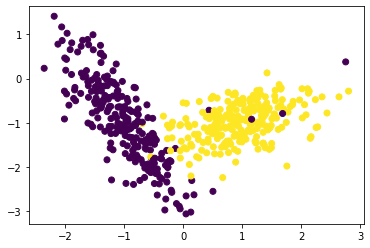

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Adding bias term

In [ ]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))
X_[:5]
X_.shape

(500, 3)

Splitting the data into train and test
- To test the model on unseen data

In [ ]:
from sklearn.model_selection import train_test_split


# reserving 20% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
opt_weight, error_list = gradient_descent(X_train, y_train)


Checking the learned parameters and loss

In [ ]:
##learned parameters
opt_weight

array([[0.11877655],
       [2.30509204],
       [0.11405031]])

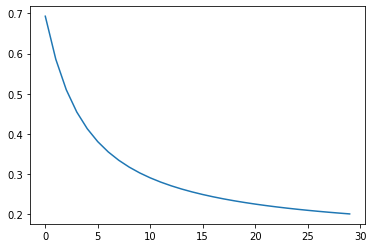

In [ ]:
plt.plot(error_list)

Plotting the Hyperplane that best separates the original data

In [ ]:
##generating points to plot the learned line
x1 = np.array([-1, 1])
x2 = - (opt_weight[0] + opt_weight[1]*x1) / opt_weight[2]
print(x2)

[ 19.16974639 -21.25262639]


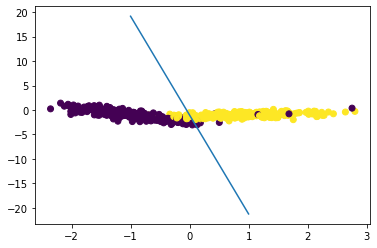

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(x1, x2)
plt.show()




### Big Picture 

 Let's see all the steps together
 0. The data we have here, n samples with $x_i$ and $y_i$ such that $y_i$ have value either 0 or 1

 1. For classification of data, we need a  linear seperator hyperplane i.e $w^Tx_i+w_0$

 2. Since $z_i = w^Tx_i+w_0$ ranges from $(-∞,∞)$, we squashed the $z_i$ values between 0 and 1 using sigmoid function. 
    - These values between 0 and 1,  can also be seen as a probability of $y_i=1$ given $x_i$

 3. After that we want to compare $y_i$ and $y_î$ and why log-loss works 
 4. Then we defined how our cost function looks and why regularisation is needed 
 5. As covered in Linear Regression, hyper parameter tuning for over-fitting and under-fitting trade off, in order to find the best model. 
    - The hyper parameter here is $λ$ or regularization parameter.
 

<img src='https://drive.google.com/uc?id=1V59eCP7m-y21_gZ8QY4xsBMvGG8LHXff'>



<img src='https://drive.google.com/uc?id=1J51riAC25oXNe7GHId0_0nGyD1BWB-Ms'>


### Accuracy Metric

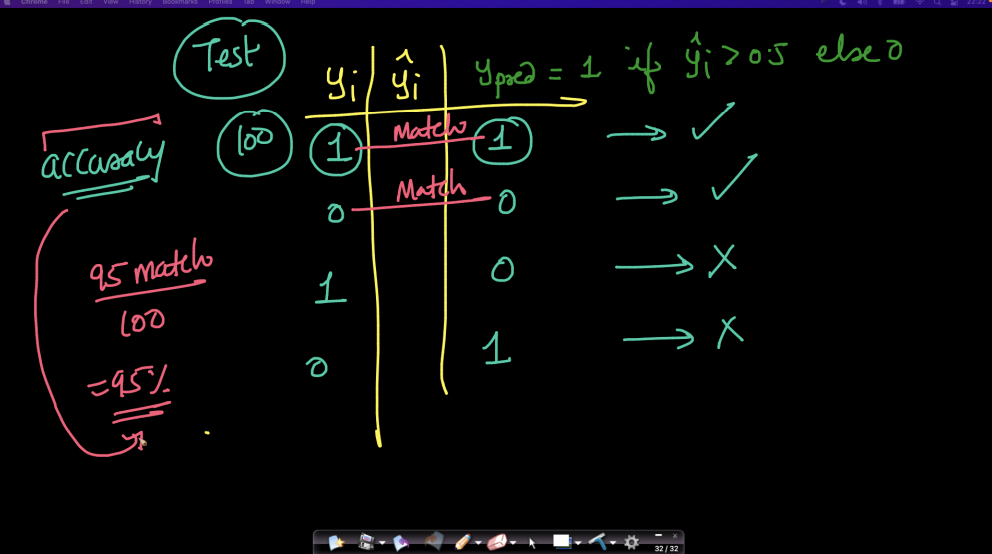

#### How  can we say, that the model we have got is the best one ?
- Recall how we used threshold after we find $y_i$ so it has values either 0 or 1. Lets call it $y_pred$ 

- Now for accuracy metrics, we use a simple concept of how many times $y_i$ and $y_{pred}$ matches.

lets take an example:
- Supposedly we consider 0.5 as threshold 
- $y_{pred} = 1 $ if $y_î > 0.5$ else 0
- Now, if we had 100 samples on our test data
    - accuracy finds where $y_i$ has the same value as $y_{pred}$

- Now if there are 95 matches out of 100 samples , then accuracy = $\frac{95}{100}*100 = 95%$ 

Lets get back to our scratch code implemented model and check how it performed on our test data. 


Plotting test data

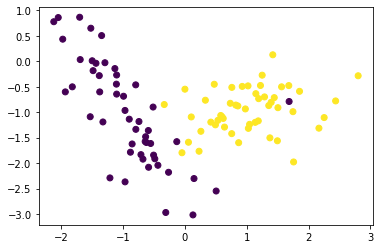

In [ ]:
plt.scatter(X_test[:, 1], X_test[:,2], c = y_test)
plt.show()


creating $y_{pred}$

In [ ]:
y_pred  = np.round(hypothesis(X_test, opt_weight)).astype('int')
print(y_pred.shape,y_test.shape)

(100, 1) (100, 1)


How good is our model? - Evaluation using accuracy metric

In [ ]:
def accuracy(y_test, y_pred):
    return (y_pred == y_test).mean()

In [ ]:
accuracy(y_test, y_pred)

0.94

### Log-odds interpretation

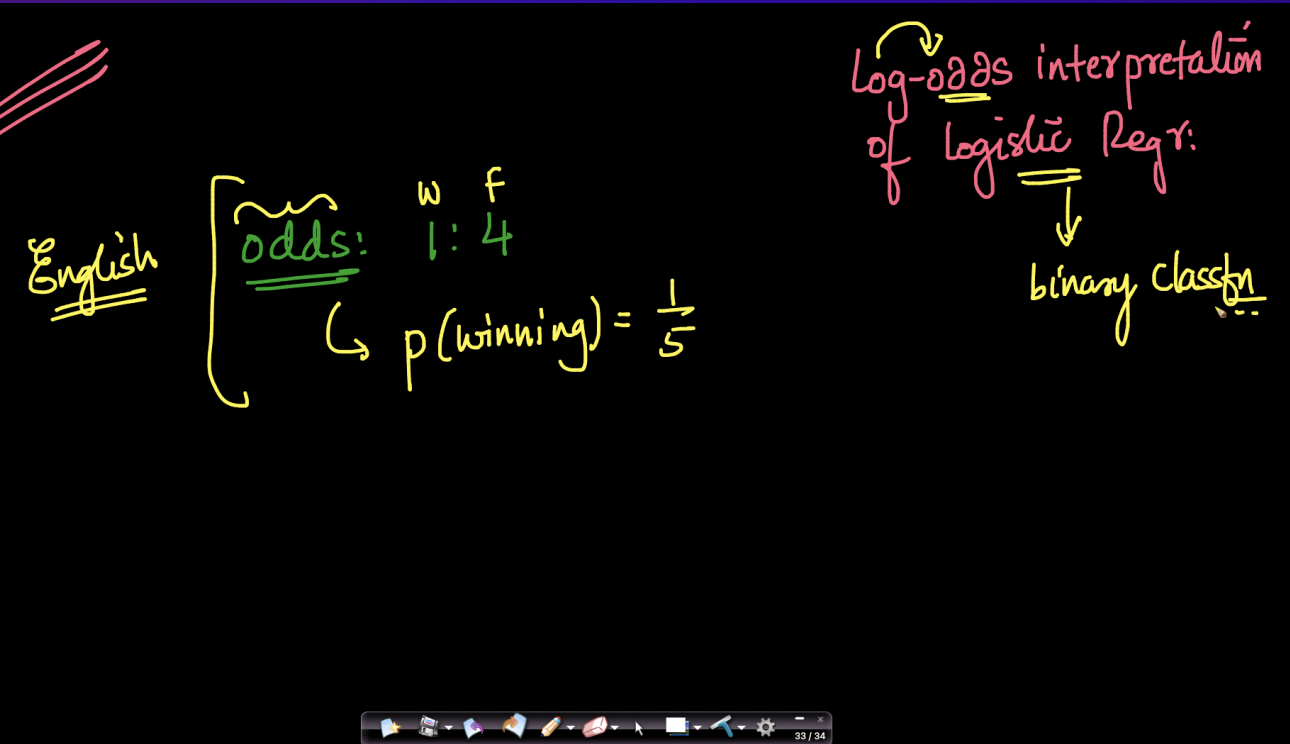

Before we start lets understand what is odds with simple example
- Supposedly we are in a casino and our betting on a number 
- and the odds of winning is 1:4, which means for every one win, i most likely am losing 4 times

#### What will be the probability of me winning the game ?
- p(winning) = 1/5


Now that we understand what odds are, lets see what log-odds are and what  significance does it plays

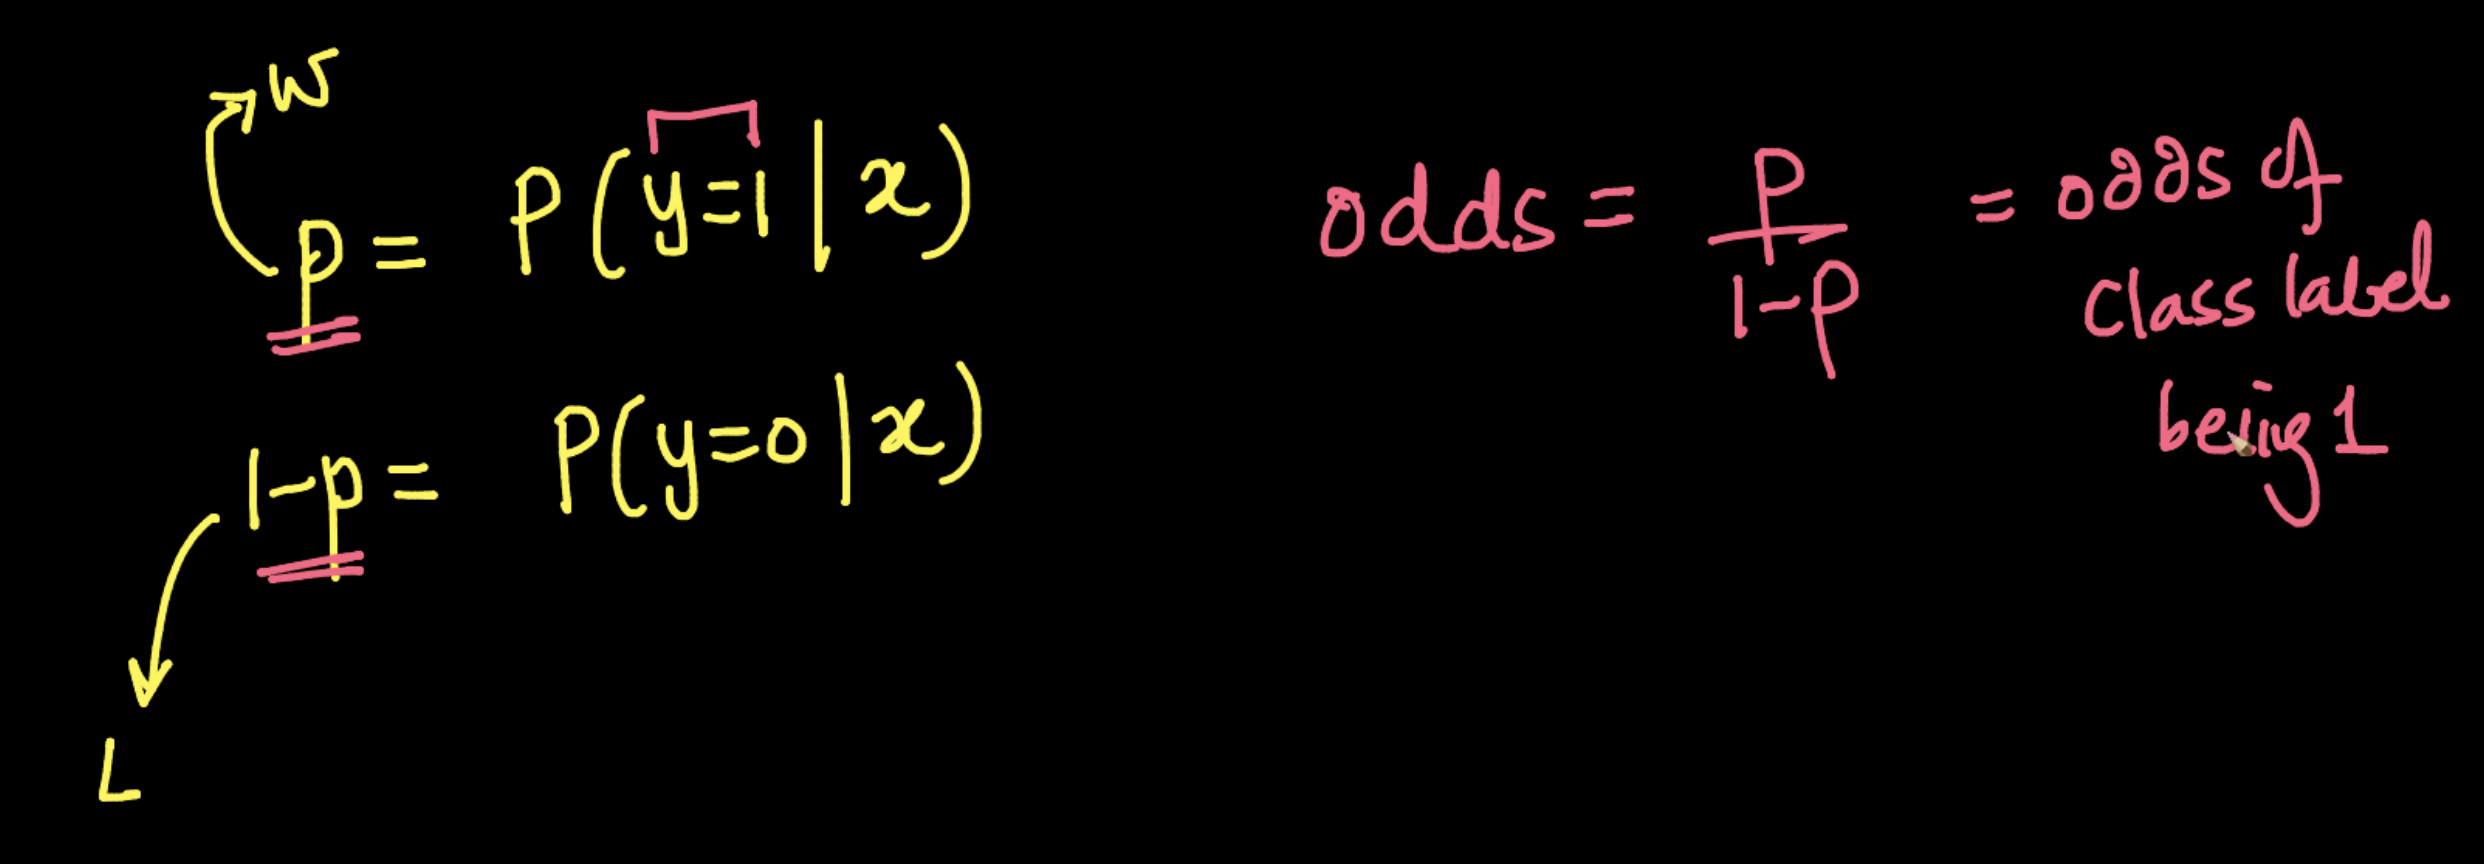

we have discussed how $y_î$ is probability of $y_i = 1$ given x 
- lets say $y_î = p = P(y_i=1|x_i)$

#### What should 1-p signify ?
- probability of $y_i = 0$ given x

#### then what can be the odds formulated ?
- odds = p/1-p
- which means the odds of $y_i$ being 1 



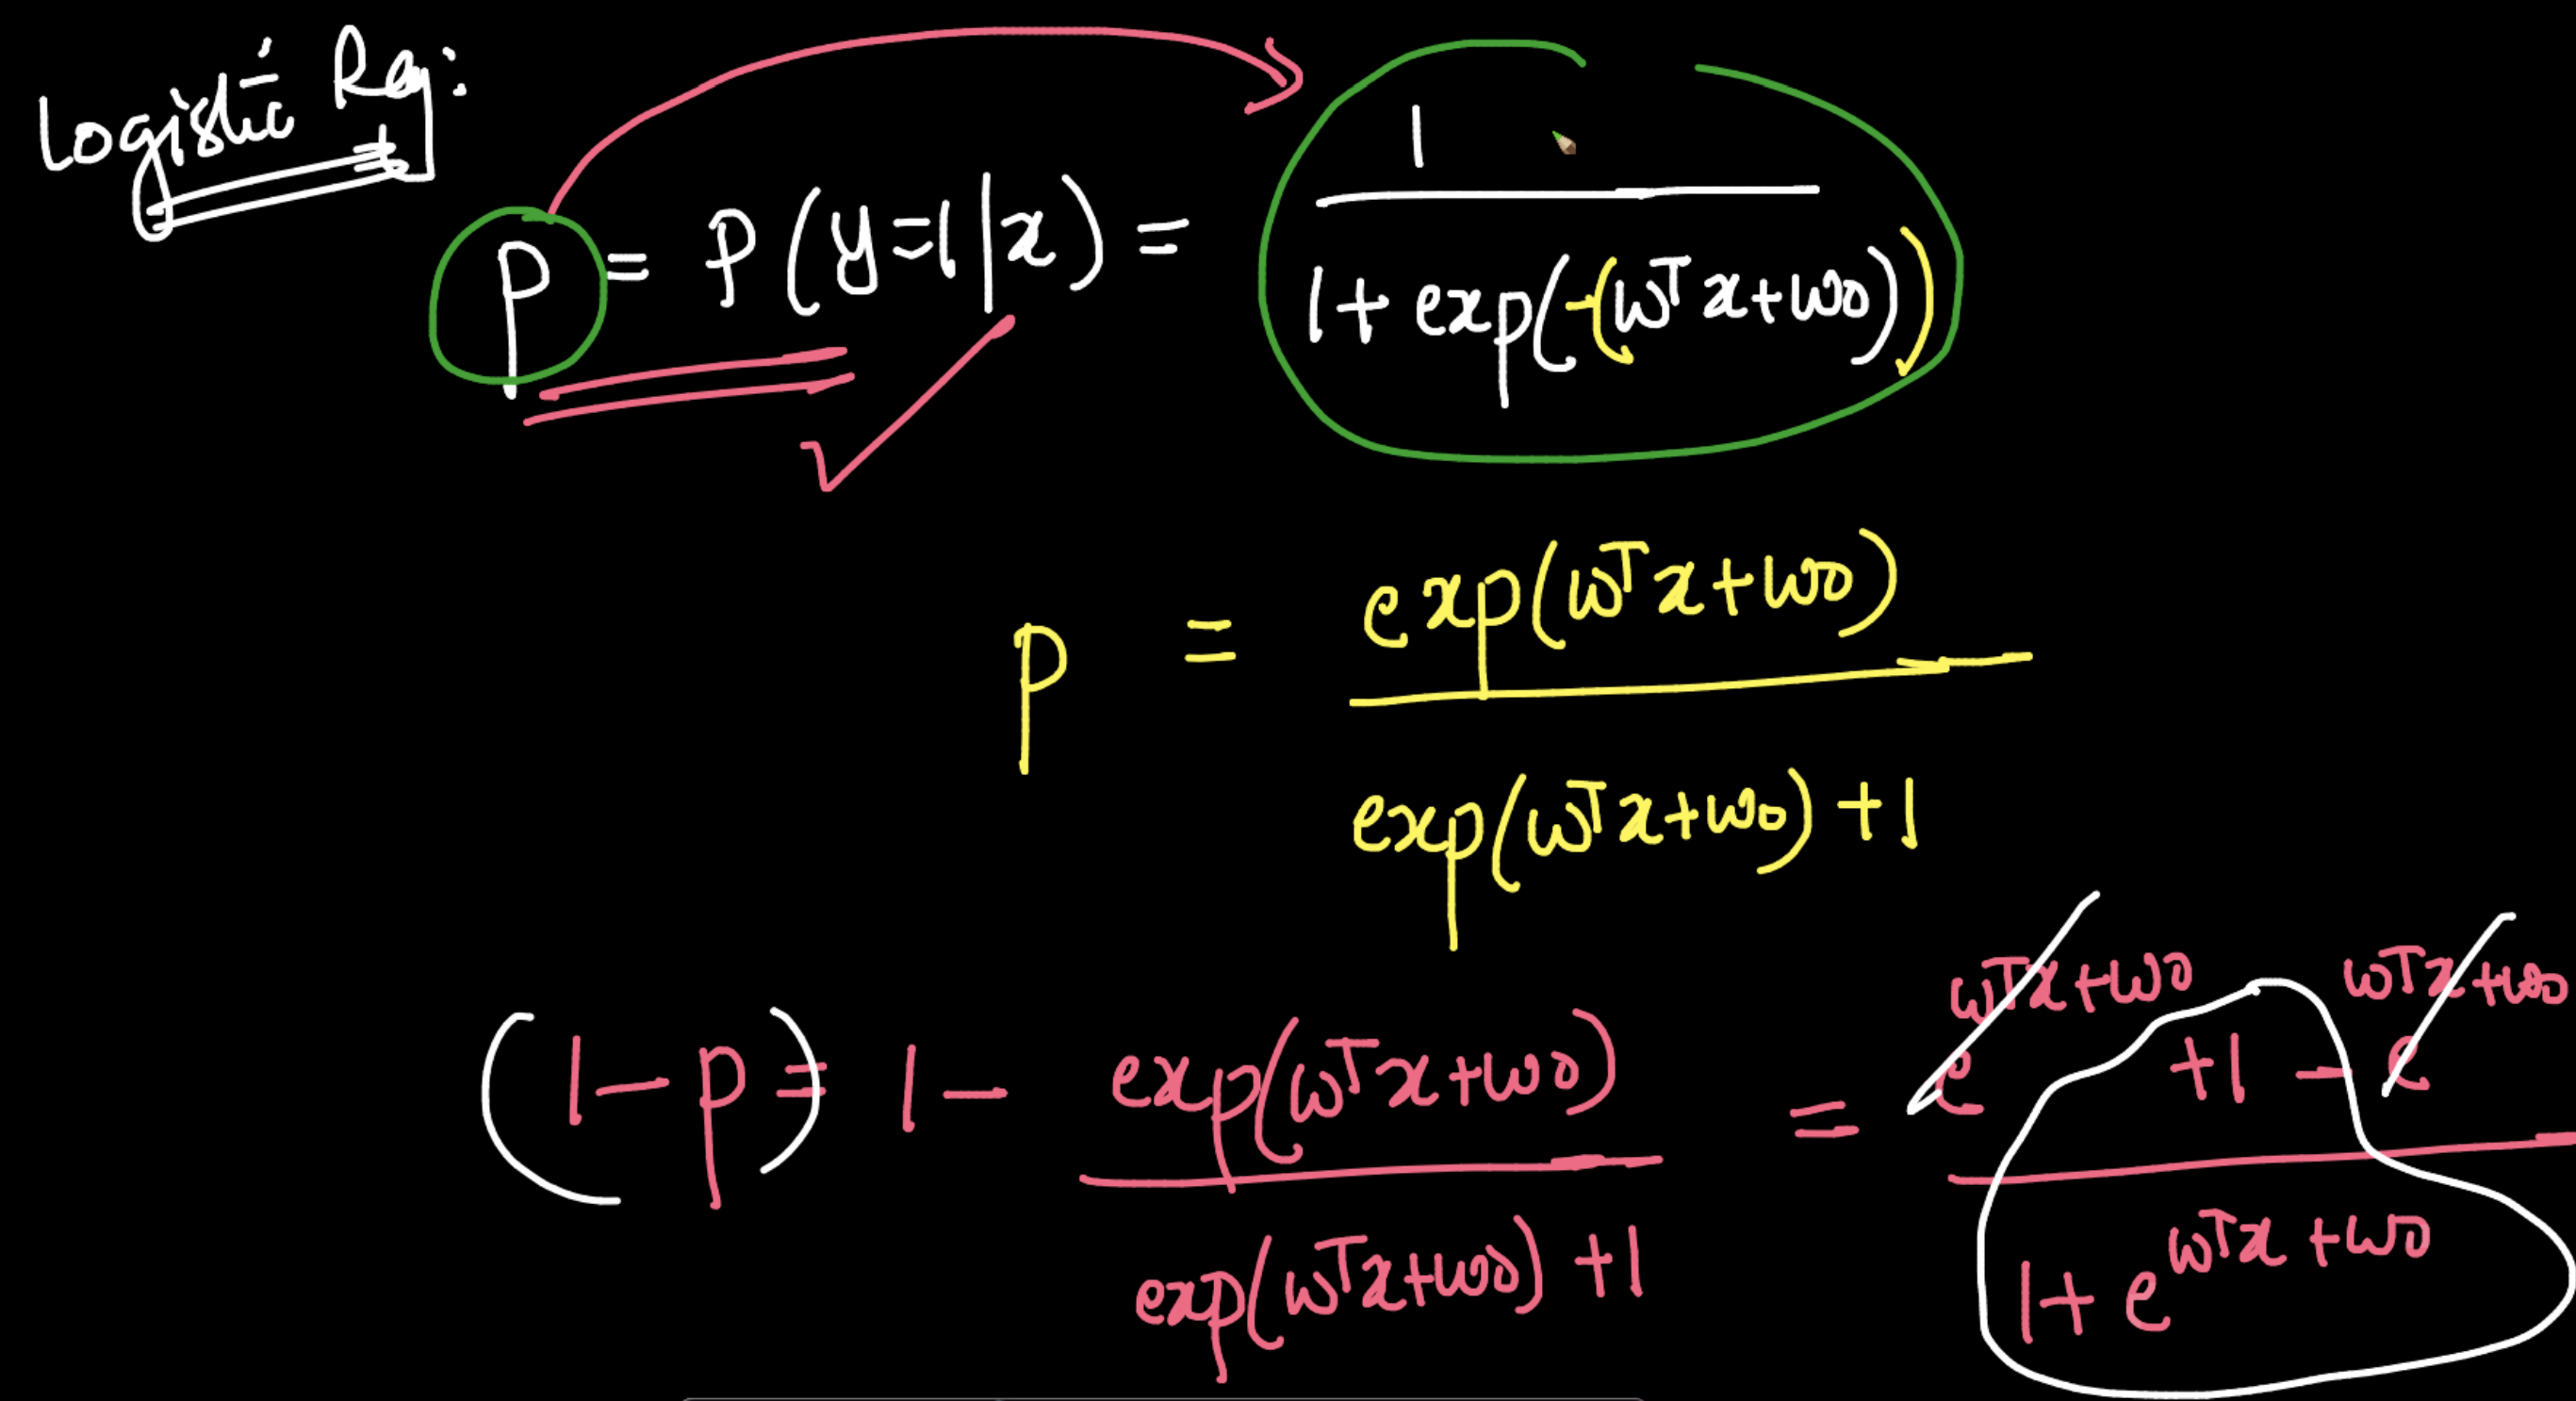

- we know how $y_î$ is $σ(w^Tx_i+w_0)$
hence we can say 
- $p =\frac{1}{1+e^{-(w^Tx_i+w_0)} } $

remember how $u^{-w}  = \frac{1}{u^w}$

Now on simplyfing the equation , we get

- $p = \frac{e^{(w^Tx_i+w_0)}} {e^{(w^Tx_i+w_0)}+1 }$

#### What about 1-p ?
- $1-p = 1 - \frac{e^{(w^Tx_i+w_0)}} {e^{(w^Tx_i+w_0)}+1 }$

On taking the LCM and simplyfing, we get
- $1-p = \frac{1} {e^{(w^Tx_i+w_0)}+1 }$






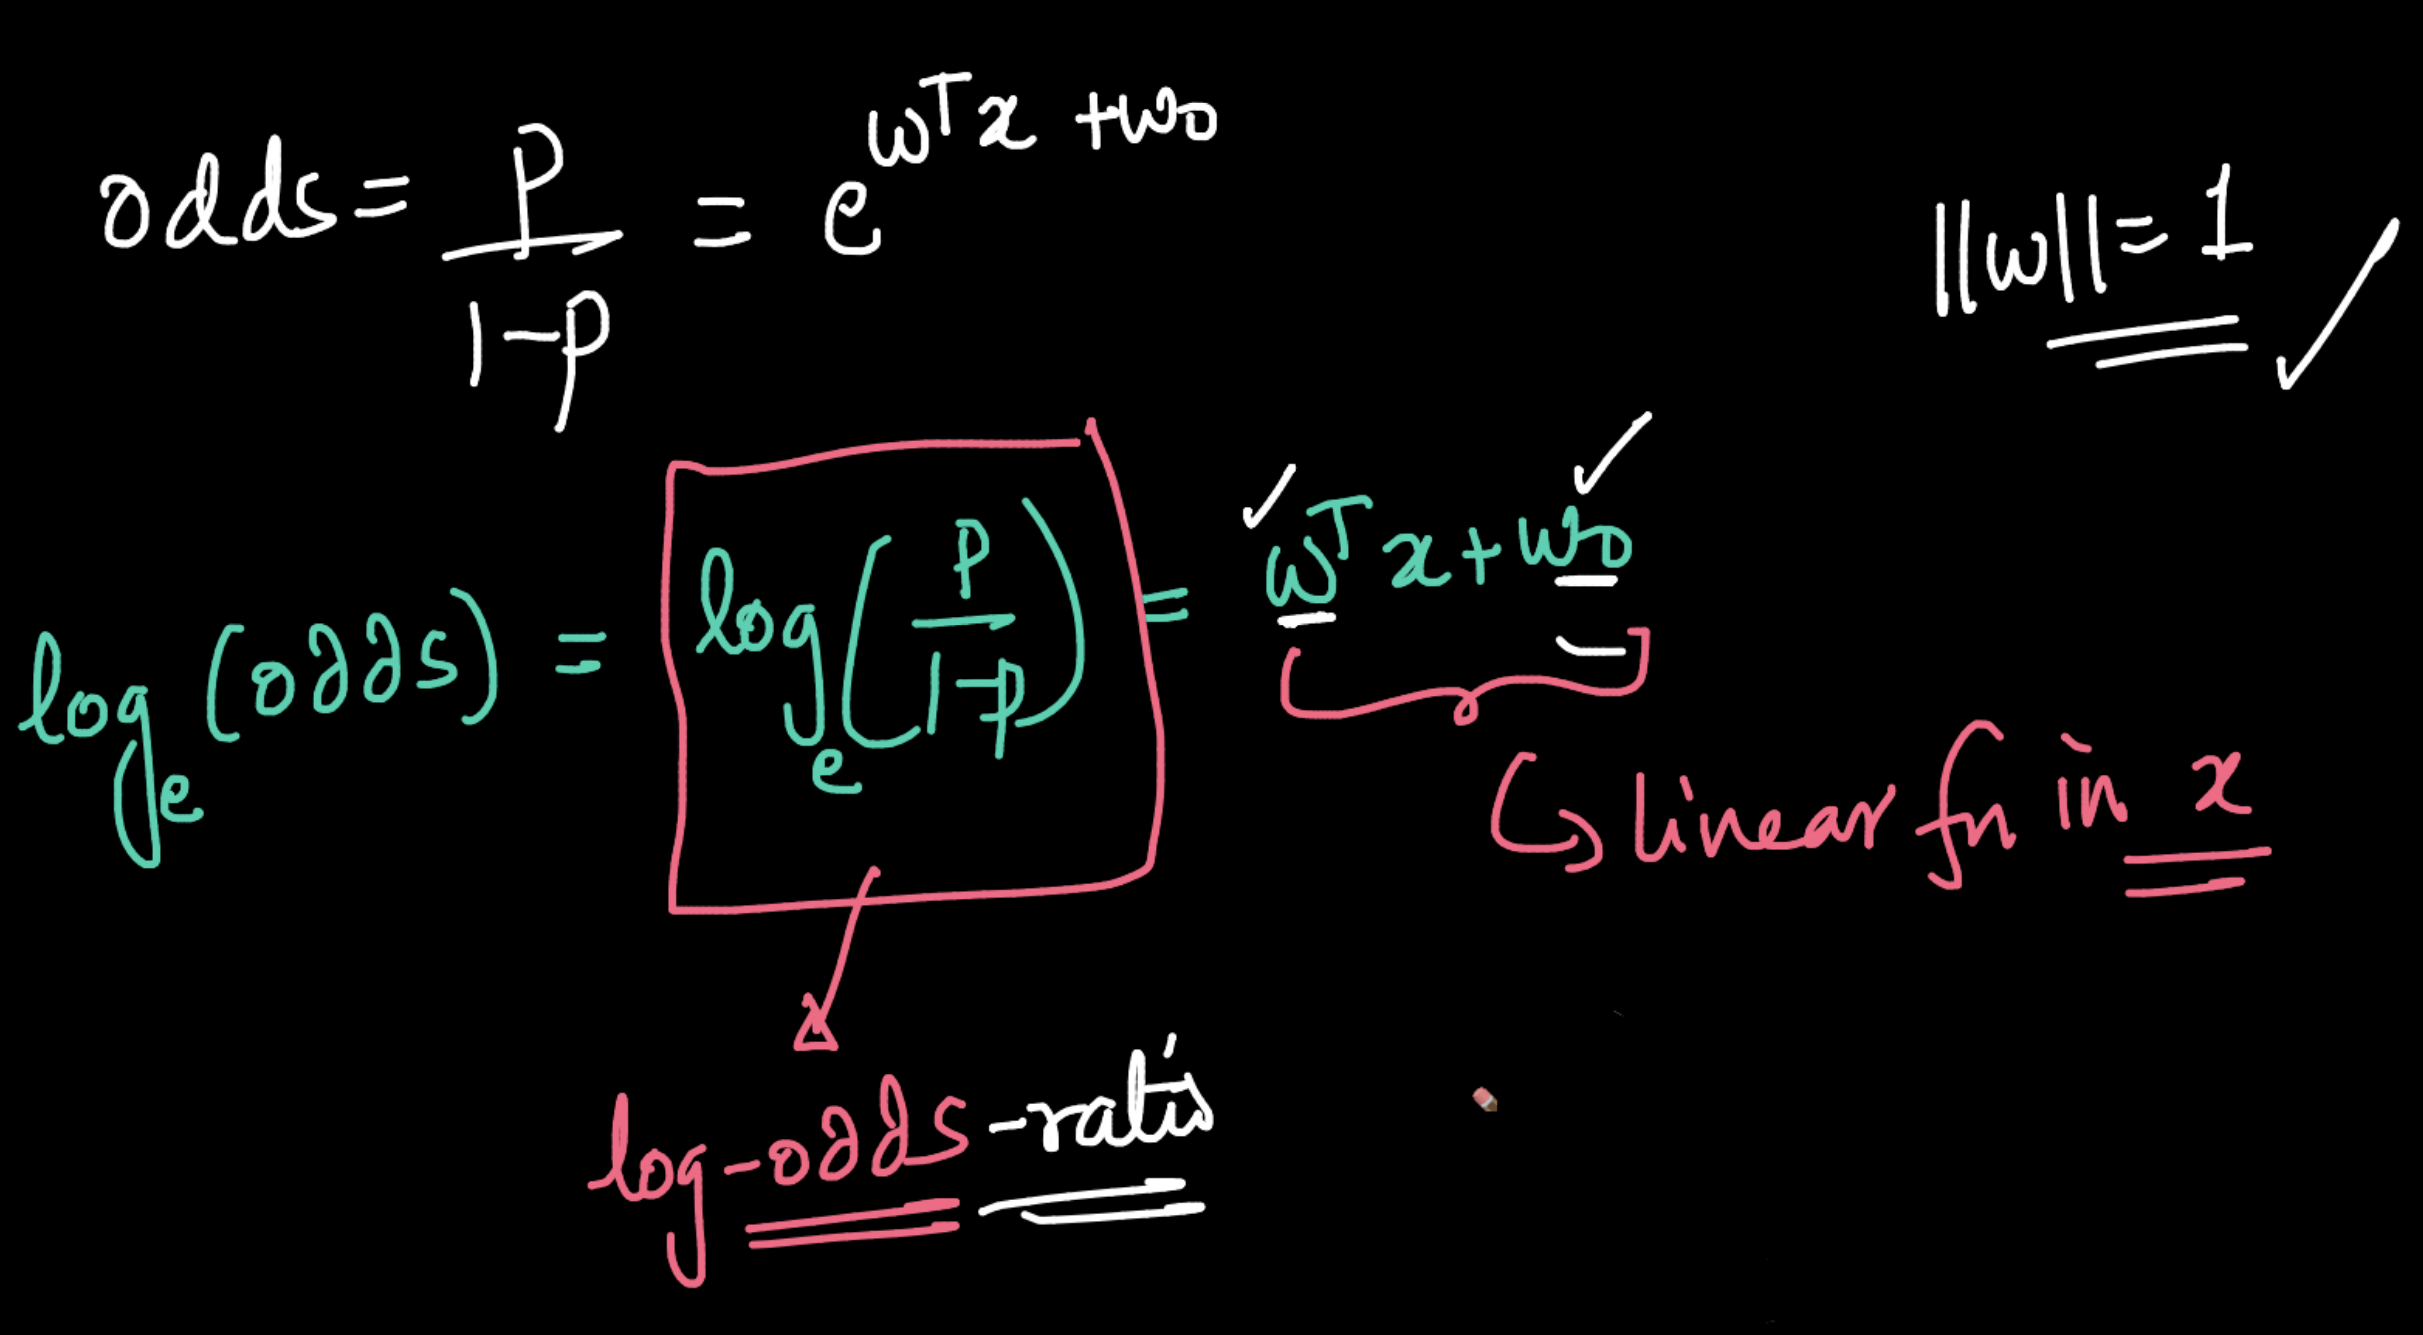

Now the odds for Logistic Regression becomes 
- $odds = \frac{p}{1-p} = e^{(w^Tx_i+w_0)} $

taking log with base e on both sides,
- since $log_a a = 1$

therefore 
- $log_e(odds) = log_e(\frac{p}{1-p}) = w^Tx_i + w_0 $

#### What does the log-odds being a linear function mean ?

- Logistic Regression Model is similar to a linear model which is predicting log-odds of $y_i=1$ vs $y_i=0$.



# Impact of outliers



#### Does Outliers have any effect on our Logistic Regression Model ?




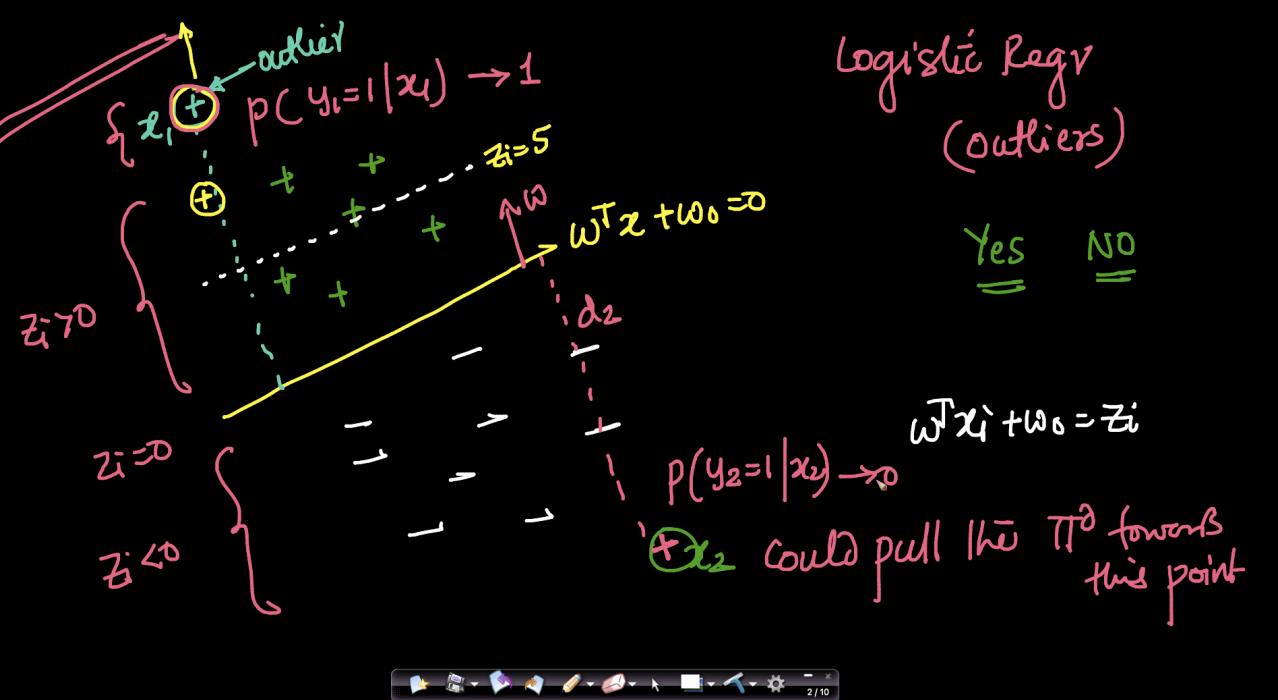

- Let's assume that we have hyperplane $w^Tx+w_0$ with $z_i=0$ or $σ(z_i)=0.5$
- Now lets assume we have an outlier with $Y=1$ belonging to the when $z_i>0$
    - is that, the outlier $x_1$, which  has $z_i>0$ 
    - Case when we have a +ve outlier on the correct side of the hyperplane

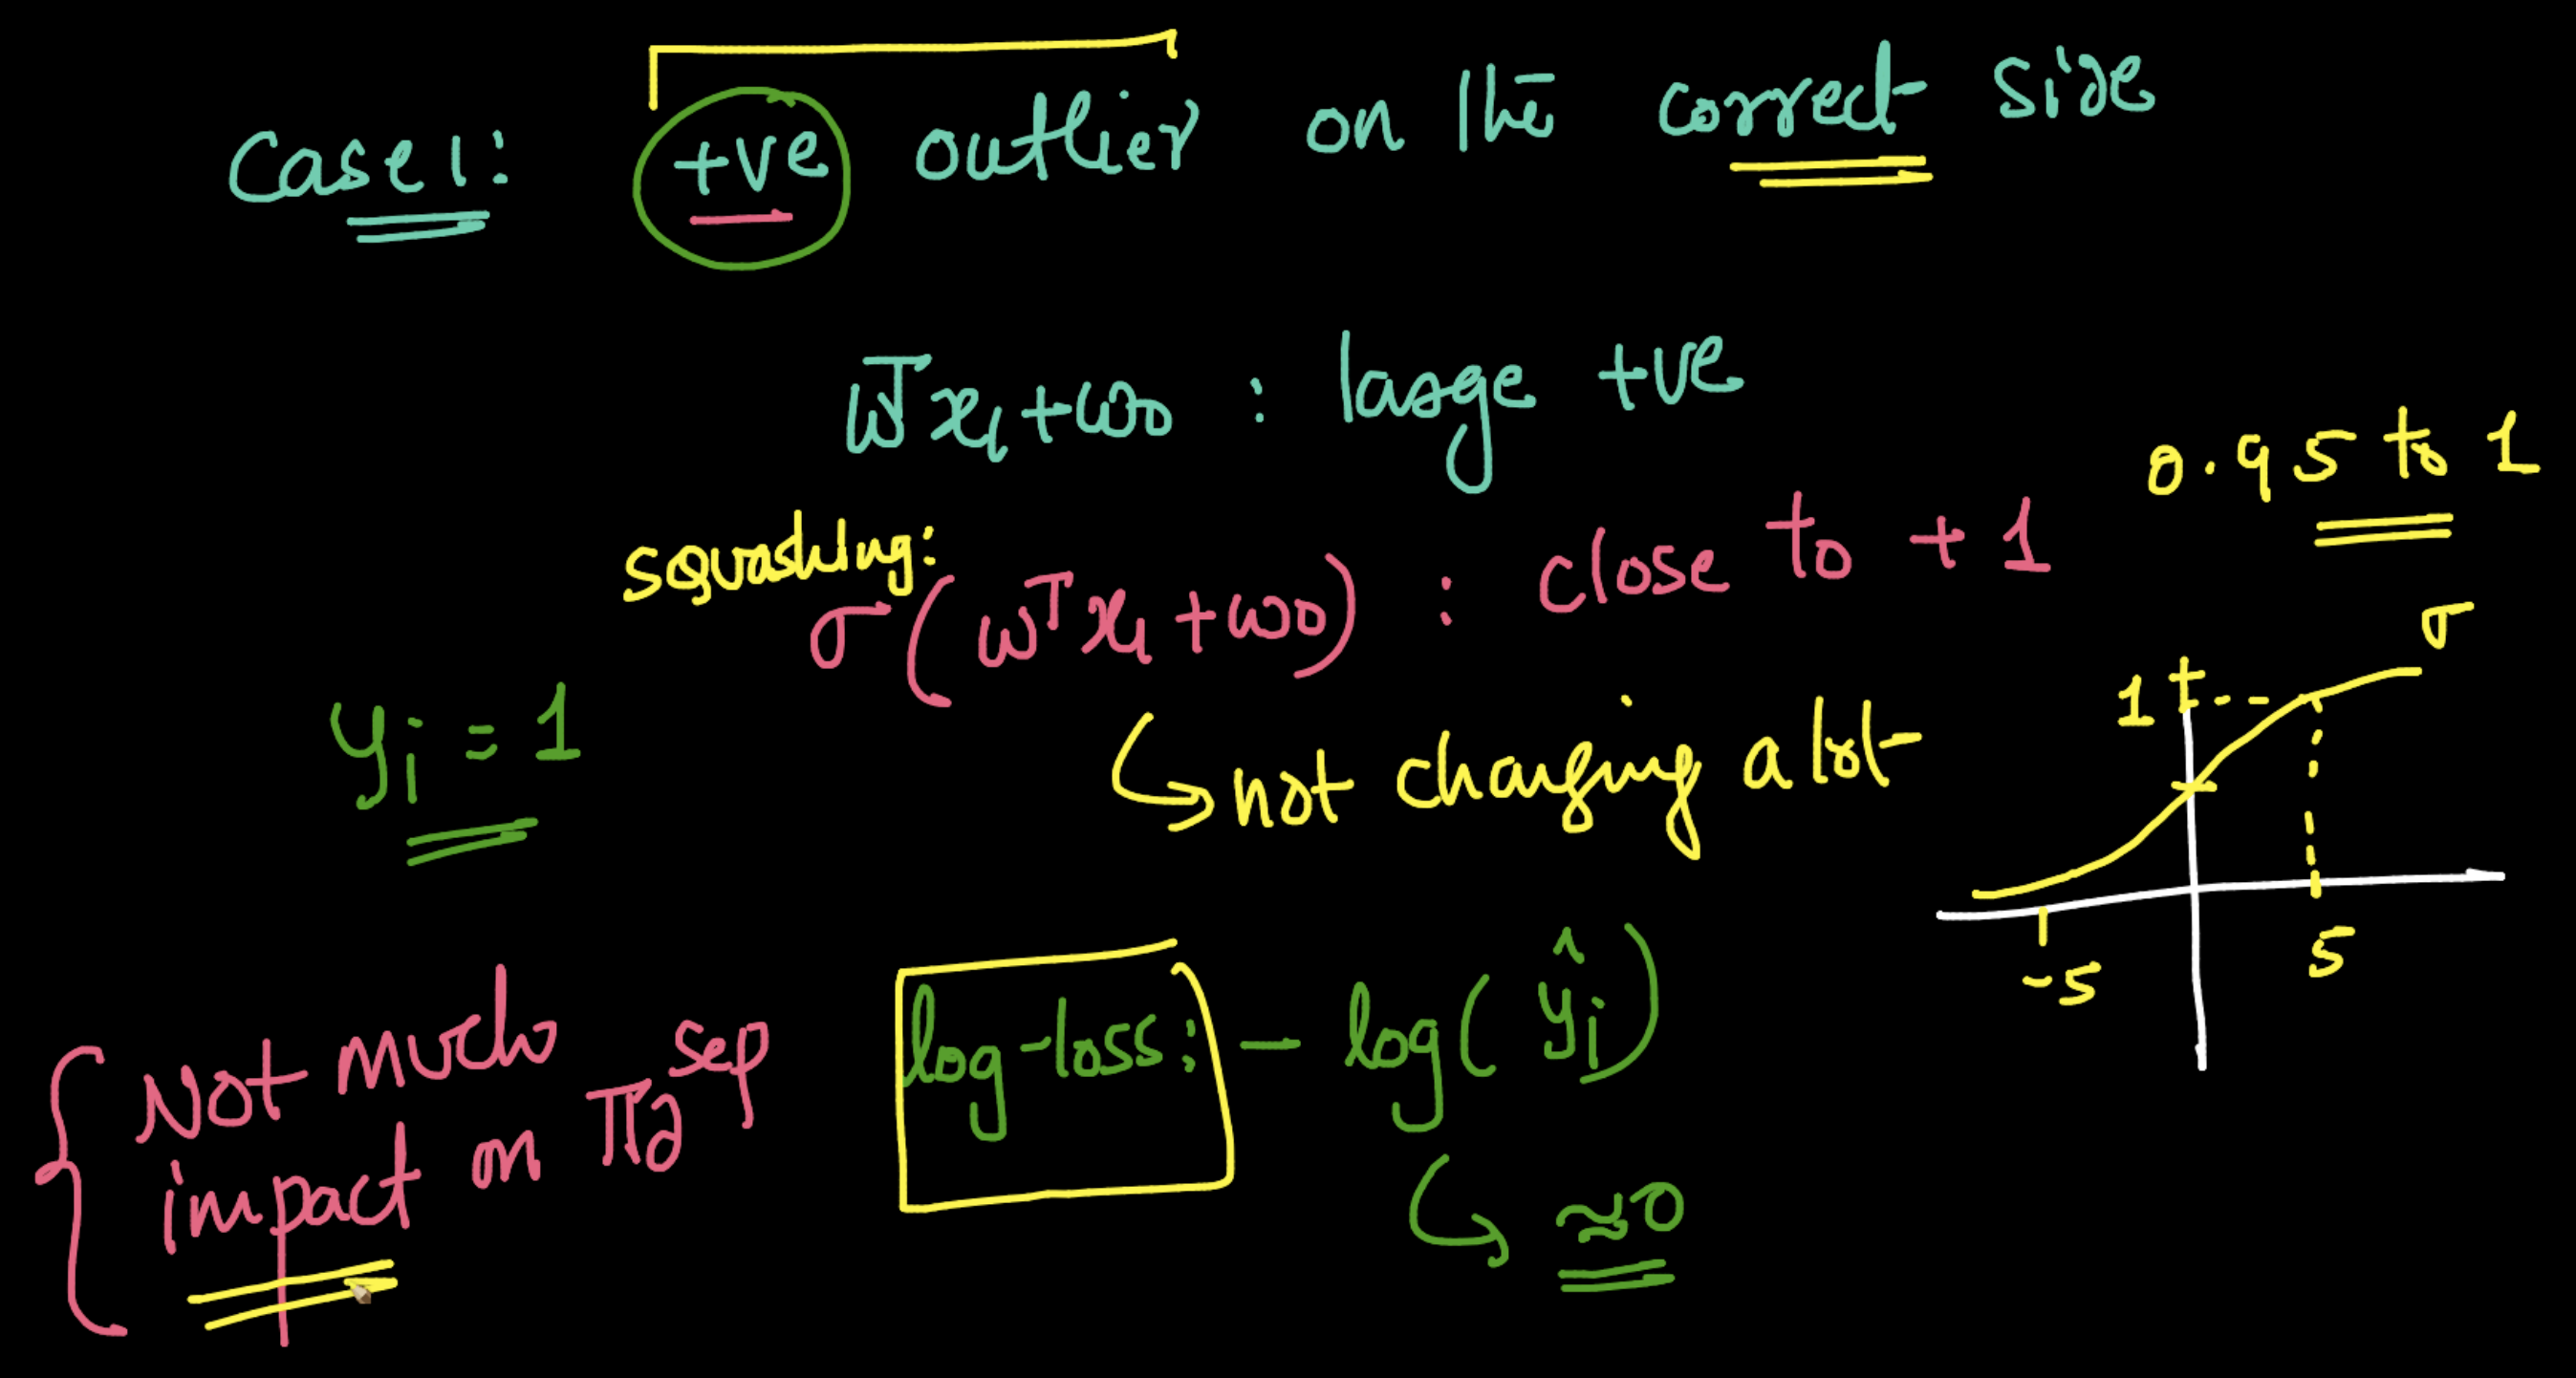

- Recall how Sigmoid value does not change alot after a certain point. 
    - Lets assume here that point is when $z_i = 5 $

- Which implies that there will not be much change in the Sigmoid value of the outliers as compared to  the rest of the data.

- Now for our log-loss for y=1 will be $-log(y_î)$,  we know how $σ(z_i)$ gets very close to 1 for high value of $z_i$, 
- and we also know log(1) = 0. 
- Hence Log-loss tends to zero for outlier value, causing zero to negligible effects on the weights of the model.

- Thus not impacting the hyperplane at all




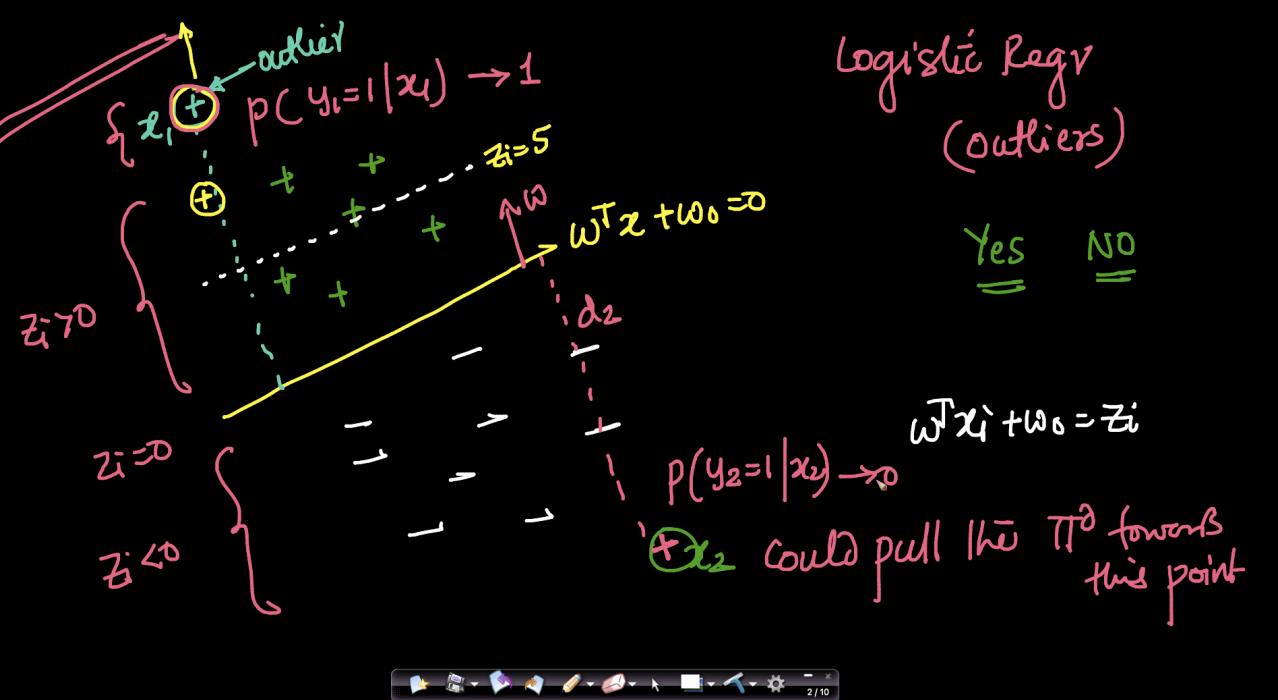

- Now lets assume we have another $Y=1 $ or +ve outlier but its $z_i<0$ which makes it lie on the wrong side. ofthe hyperplane

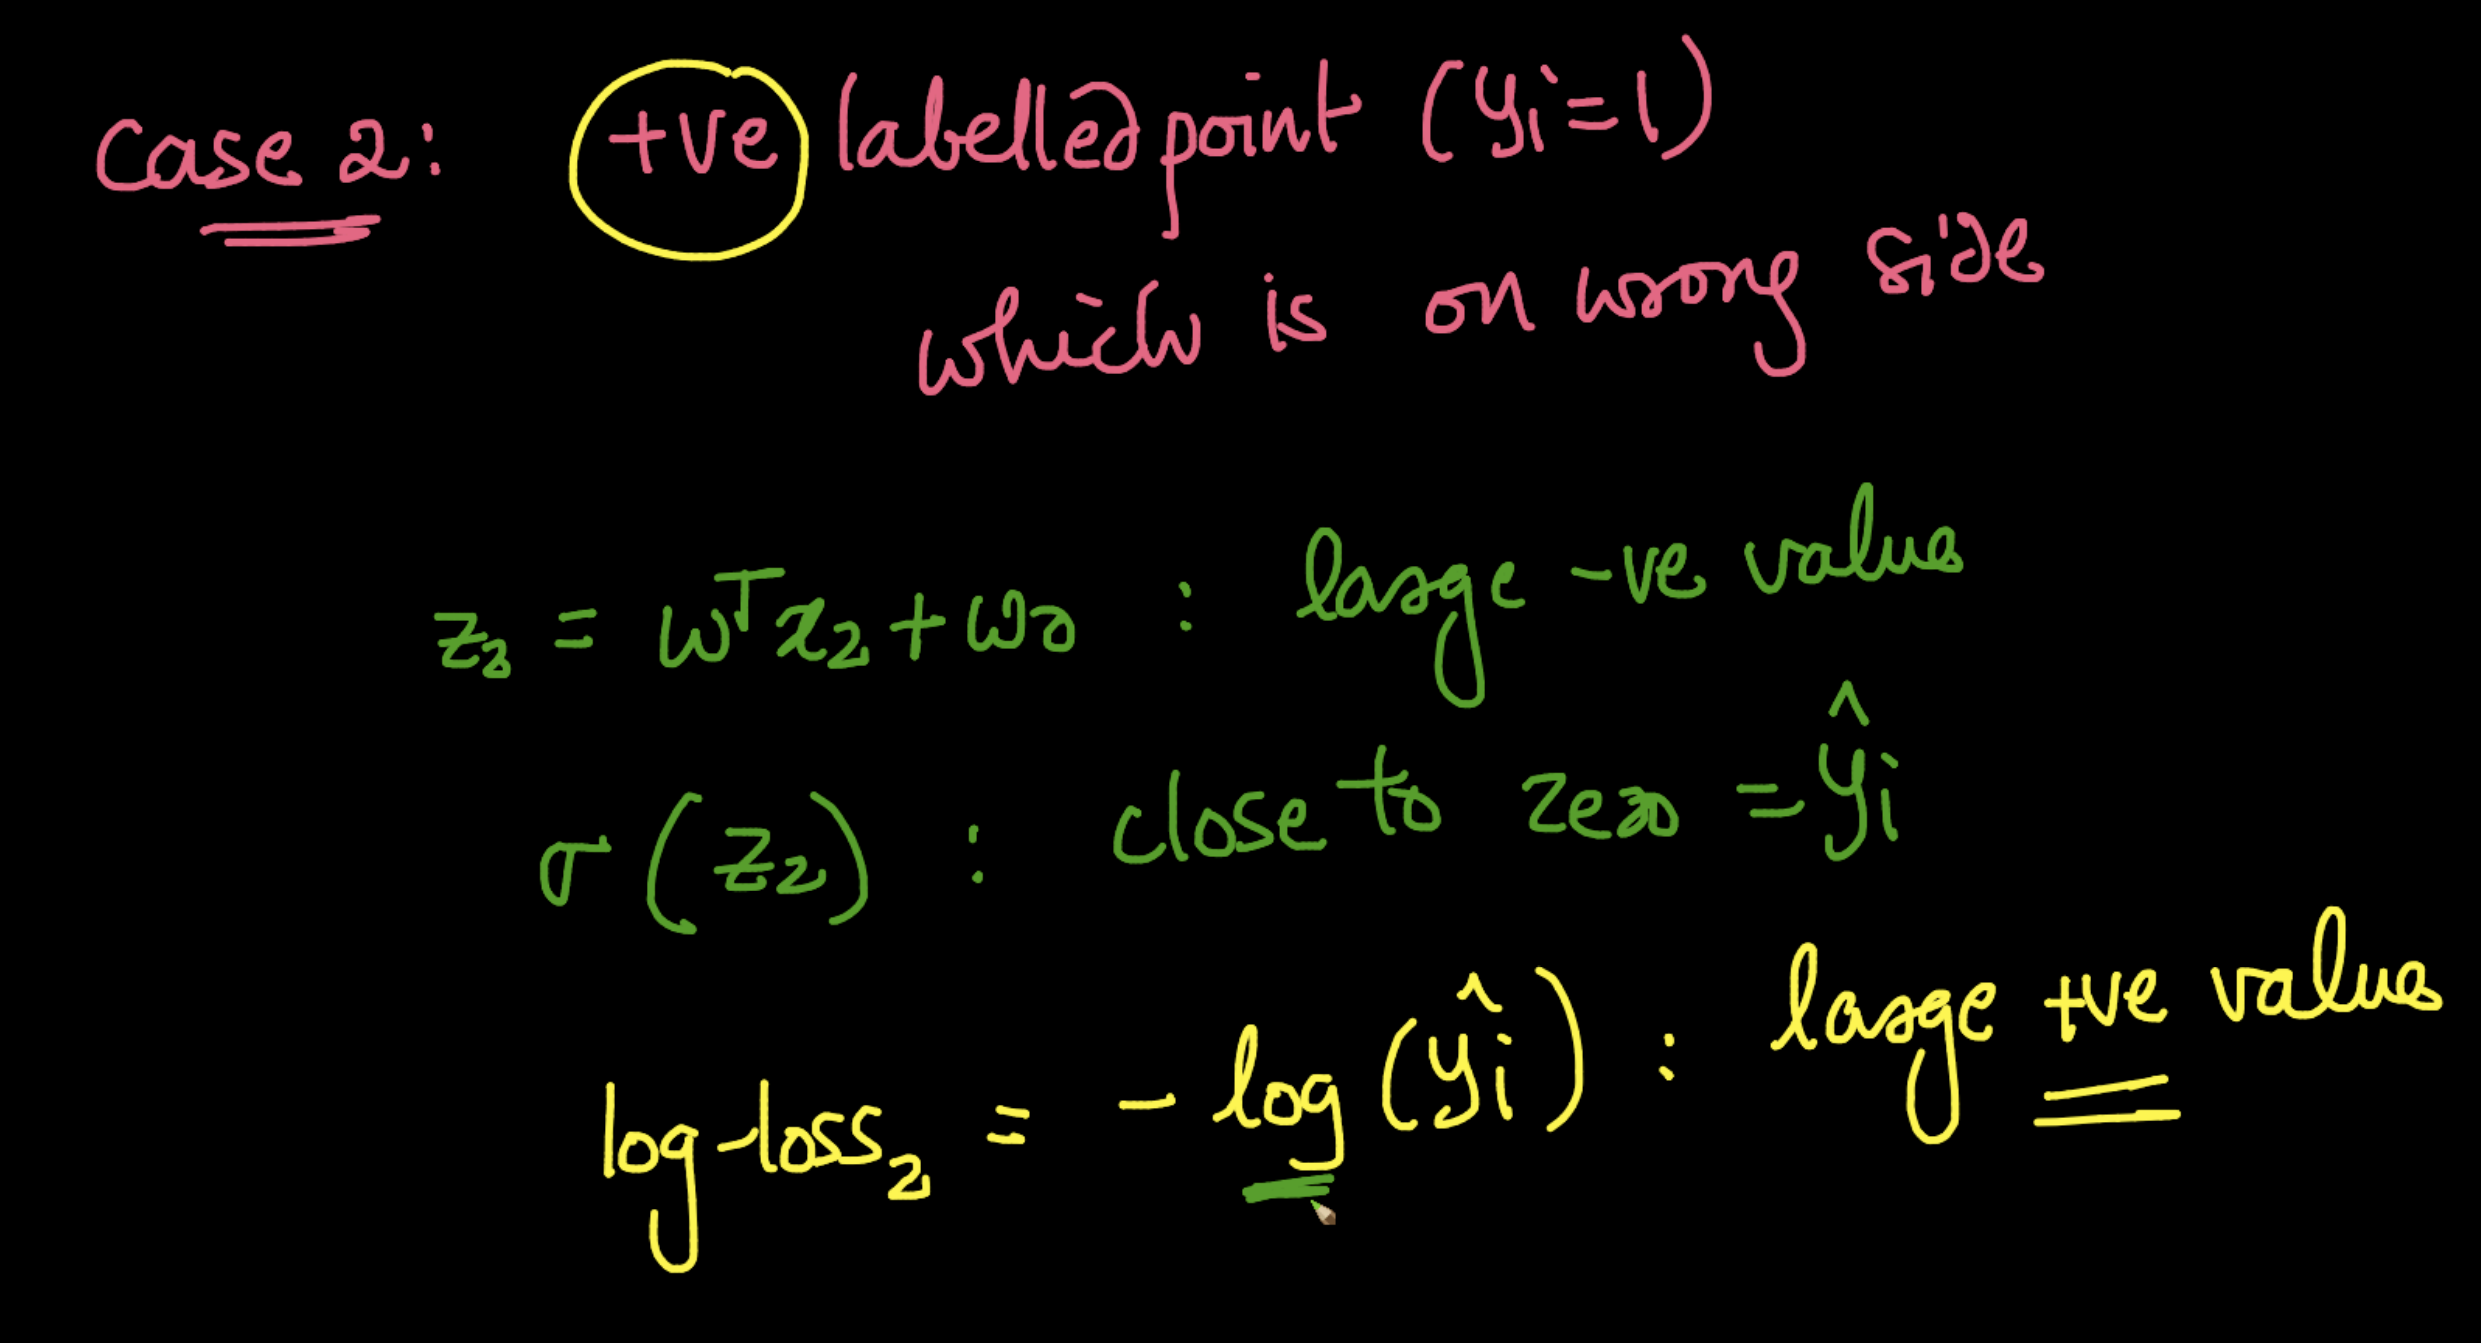

- Now since $z_i$ will be a large -ve value for the outlier, its $σ(z_i)$ will become very close to zero 

- Now since its a +ve outlier or $y=1$, our log-loss becomes
    - $log-loss= -log(y_î)$

- Recall when, $y_î$ tends to zero when $y=1$,  $-log(y_î)$ is a very large +ve value 

- Making this outlier, to have an impact on the weights of the model/hyperplane

- Causing the hyperplane to move towards the outlier



**Key Points**

> Outliers, in case of Logistic Regreesion may or may not have the effect on the result/model.

> Having Sigmoid function can reduce the effect of the outliers or even nulify them in some cases






### Churn prediction Code Implementation 

Lets now discuss a real world scenario and see how logistic Regression model can help us 

Problem Statement:
- The dataset is in telecom domain, that contains some Customer features such as {last month bill, usage , Account Length} 
- and we want to predict if the customer will churn or not 

#### what does churn mean?
- Lets take an example, 
- supposedly we are a customer of Airtel 
- and for some reason we have switched to another telecom company,
- Then we have churned as a customer 

#### Why even predict customer churn or not ?
- The Telecom company, after predicting those customers who will churn
- can reach out to them and provide offers such that they do not churn

#### How is this a Classification problem ?
- We can see how the customer can either churn (1) or not Churn (0) based on the features of customer 


Importing libraries

In [ ]:
#Churn prediction in telecom.
import numpy as np 
import matplotlib.pyplot as plt 

Downloading the file

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 94.3MB/s]


In [ ]:
import pandas as pd 
churn = pd.read_csv("churn_logistic.csv")
churn.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Intl Plan  VMail Plan  Day Calls  ...  Eve Calls  \
0               1          0           1        110  ...         99   
1               1          0           1        123  ...        103   
2               0          0           0        114  ...        110   
3               2          1           0         71  ...         88   
4               3          1           0        113  ...        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone Churn  
0       415  382-4657     0  
1       415  371-7191     0  
2       415  358-1921     0  
3       408  375-9999     0  
4       415  330-6626     0  

[5 rows x 21 columns]

Lets see how many samples does churn data has 

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

- Notice we have 5700 samples which are quite enough for training the  logisitic Regression model. 

Now, lets focus on ```Churn``` column which is our Y  

In [ ]:
churn["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

- We see how the data is balanced since we have equal number of samples in both the customers who churned or did not churned

Now lets see how each feature is effective in predicting Churn or Not by performing a univariate EDA 

- But since we have already studied EDA, we will do a quick  code walktrhough of it 

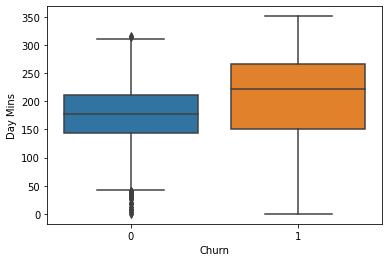

In [ ]:
import seaborn as sns
sns.boxplot(x='Churn', y='Day Mins', data = churn)

- Notice how we use feature ```Day Mins``` to check if it is significant or not 

#### What can we see from the boxplot ?
- The churned custmors have a higher median for  Day Mins than not churned customers which means:
- Customer who spent more time calling in a day tend to churn 

this shows, ```Days Mins``` is an important feature 

Now, let's see if there is any other feature which has collinearity with ```Days Mins```

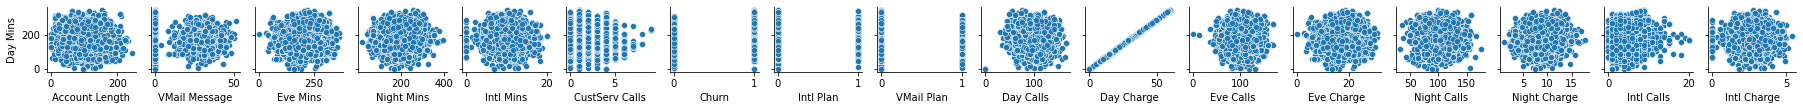

In [ ]:
sns.pairplot(data=churn, y_vars=["Day Mins"], x_vars=['Account Length', 'VMail Message' , 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'], height=1.5, aspect=1)
plt.show()

#### Can we say which feature is highly correlated with ```Days Mins``` ?
- Day Charge is highly correlated 
- meaning as Day Mins so does the  Day Charge 
- Hence we will just drop either one of them 

- notice how we are still doing the same exact things as we did in Linear Regression. 
- Since we are still training a linear model if we recall log-odds

Now lets see another feature ``` Account Length``` 

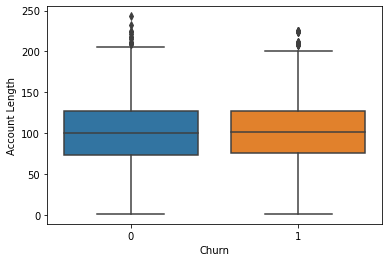

In [ ]:
sns.boxplot(x = 'Churn', y= 'Account Length', data = churn)

#### Does the Account Length feature relevant ?
- If we see median for both, its quite similar
- Hence this feature does not have any signficance and can be dropped 




We are skipping the rest of the EDA but Students should take it as an exercise and perform more EDA to find out which features has some relation with target variable

#### What all EDA can do ?
- Remove useless Features 
- Remove highly Correlated Features 


We are now taking a few of the Features which might not be the best ones to choose for this problem statement.

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

#### Train test Split

- Splitting the data into training and testing as done in Linear Regression 

#### But what should be the ratios for splitting ?
- 80% is training data and 20% is test 

- We know the importance of Validation data, hence we split the 80% data as 60% and 20%, where
- 60% is Training data and 20 % is cross Validation data  

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(3420, 5)

Now, lets do column standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

 [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using scikit Learn

- If we see L2 regularization is done by default 
- We see there is no Regularization Parameter λ 
#### How to vary Regularization Parameter λ ?
- There is a C parameter which is Inverse of λ 

There are other parameters which we will learn in later lectures but as for now we will be focusing only on these parameters.

Lets start with implementation of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

Now, let's see the weights of each feature except $w_0$ 
- Since $w_0 $ is also called Intercept of the model





In [ ]:
model.coef_

array([[ 0.01264284,  0.00599041,  0.59130155,  2.27070333, -0.02425876]])

- observe how the weight of feature 4  i.e ```intl plan``` (international Plan) is highest

#### What can we say about ```intl plan``` ? 
- Since we have already Standardize the data, the weight for this feature is a large positive value 
- that means customers having more "intl plan" will probably churn more

Next highest weight is for Feature 3 ```CustServ Calls``` which is Customer Service Calls.
#### What can we say about it ?
- Meaning if a Customer does a lot of Customer Service Calls, the customer will churn 

We also have an intercept weight 

In [ ]:
model.intercept_

array([-4.89296082])

- Till now haven't done any Hyper parameter tuning

let's start doing hyper parameter tuning on parameter C 

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 20000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

The code is similar to the code explained in Linear Regression 


- First we initialize the values for $λ$
- then for each value of $λ$
    - Then create a pipeline for standarization scaling and Logistic Regression model 
    - Then fit the train data to the model
    - And get the scores of the train and validation data set
    

NOTE: the default scoring metric is Accuracy 



In [ ]:
len(val_scores)

200

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

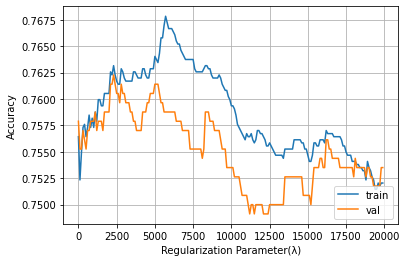

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 20000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 20000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



- We see how Validation increases to a peak and then decreases



- Notice as Regularization is increasing, the Accuracy is keep on decreasing since model is moving towards Underfit

Now if we increase the  Regularization further to 50000, Lets see what happens


In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 50000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)


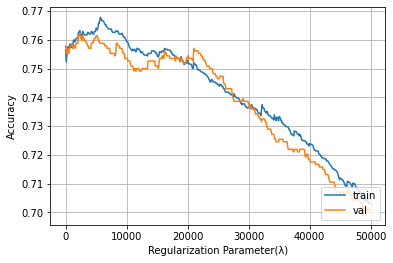

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 50000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 50000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

#### What can we see from the increased value of Regularization Parameter?

- We see how the model starts underfitting and performing poorly on the train and validation data

- Now we pick that $λ$ we are getting the maximum validation score

In [ ]:
np.argmax(val_scores)

23

In [ ]:
val_scores[23]

0.762280701754386

- We observe that validation score is maximum of 76.2% when index = 23, thus our $λ$ best becomes:

In [ ]:
l_best = 0.01 * 23 * 100

- We do this since we are stepping 100 in each iteration 

Lets train model with best λ

In [ ]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.043478260869565216))])

Now test this best model on our test data

In [ ]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.7657894736842106


NOTE: The scaler in the pipepline performs scaling first and then the logistic Regression,
- the scaler uses training data mean and standard deviation when model is in training 
- And continues using it for Validation and Test data since we are not using ```.fit()``` function instead just a ```.score()``` function 